In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from pandas import DataFrame
from tensorflow.keras.models import Sequential   # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense        # 층을 쌓기 위한 객체
from tensorflow.keras.optimizers import RMSprop  # 경사하강법 공식중의 하나
from tensorflow.keras.losses import mse 

In [2]:
# 랜덤의 시드값 고정
tf.random.set_seed(777)

# 입력 데이터와 출력 데이터 준비
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [1], [1], [0]])

In [4]:
label = []
for y in train_y:
    label.append(y[0])

df = DataFrame(train_x, label, columns=['x', 'y'])
df

,x,y
0,0,0
1,1,0
1,0,1
0,1,1


In [9]:
# 모델구성
model = Sequential()

model.add(Dense(16, input_shape = (2,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = RMSprop(), loss = mse, metrics = ['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 학습하기
hist = model.fit(train_x, train_y, epochs = 100)
hist.history.keys()

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.2399 - acc: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2391 - acc: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2384 - acc: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2378 - acc: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2373 - acc: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2369 - acc: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2365 - acc: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2362 - acc: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2359 - acc: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2356 - acc: 1.0000
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2353 -

dict_keys(['loss', 'acc'])

In [17]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (15, 10)

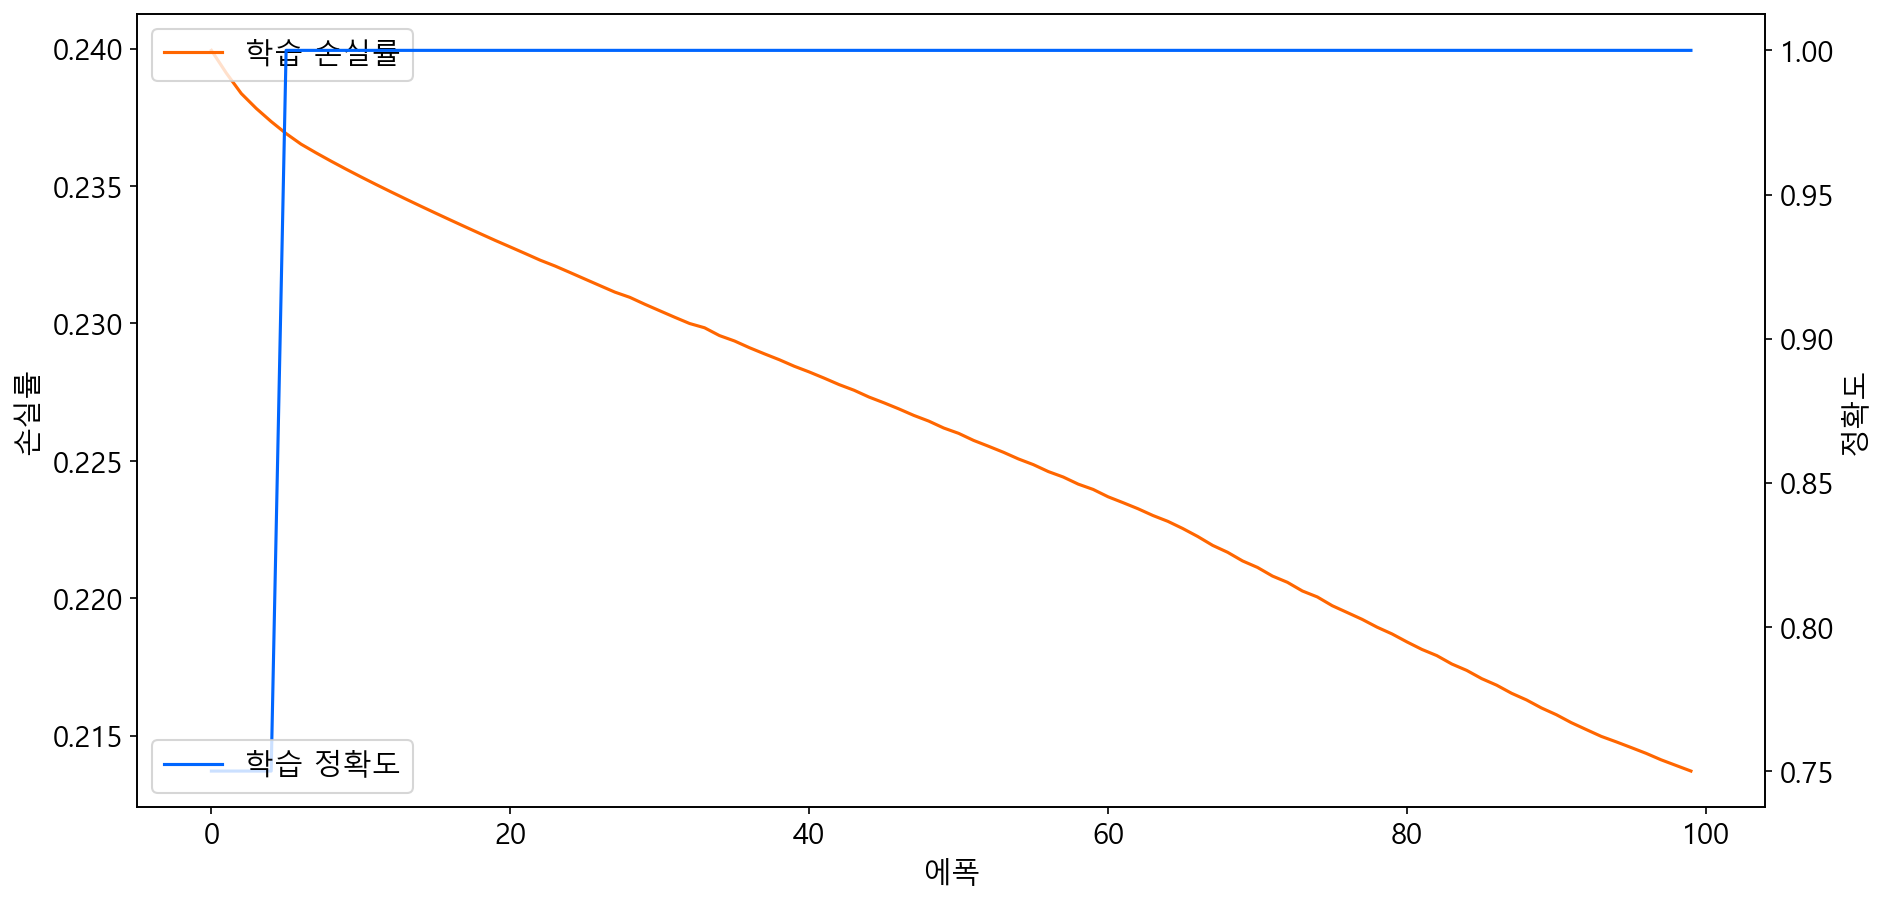

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

ax1.plot(hist.history['loss'], color='#ff6600', label='학습 손실률')
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')

ax2.plot(hist.history['acc'], color='#0066ff', label='학습 정확도')
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.savefig("graph3.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()

In [19]:
# 모델 성능 평가하기

model.evaluate(train_x, train_y)

model.get_weights()

1/1 [==============================] - 0s 237ms/step - loss: 0.2135 - acc: 1.0000


[array([[-0.23177555,  0.44143036, -0.0474245 ,  0.36438954,  0.22144258,
          0.10965262, -0.278359  ,  0.04683672,  0.4105988 ,  0.21909341,
          0.01115423, -0.306791  ,  0.04704582, -0.3109267 ,  0.47314864,
         -0.23427942],
        [-0.11498982, -0.44104698, -0.42306852,  0.05500137,  0.4383263 ,
          0.36669317, -0.5727976 ,  0.37732854, -0.03529439, -0.269804  ,
         -0.44377646,  0.41014144,  0.06256448, -0.08256239, -0.35050777,
         -0.5291516 ]], dtype=float32),
 array([ 0.        ,  0.0007635 ,  0.        ,  0.00279031,  0.00273103,
        -0.10847838,  0.        ,  0.0027549 ,  0.03707189,  0.00227136,
        -0.01199234, -0.00294151, -0.04762375,  0.        , -0.0176473 ,
         0.        ], dtype=float32),
 array([[ 0.54388213],
        [ 0.5661362 ],
        [ 0.10738218],
        [ 0.13766398],
        [ 0.15420802],
        [-0.5844372 ],
        [-0.02815723],
        [ 0.30411488],
        [-0.42721364],
        [ 0.370194  ],
      

In [21]:
# 학습결과 적용

for i in range(0, 2):
    for j in range(0, 2):
        r = model.predict([[i, j]])
        s = "%s OR %s => %s" % (bool(i), bool(j), bool(round(r[0,0])))
        print(s)

False OR False => False
False OR True => True
True OR False => True
True OR True => False
